In [12]:
import os
import time
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score



In [13]:
#!pip install scikit-learn



In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc




In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
#from google.colab import drive
#drive.mount('/content/gdrive')

In [17]:
df = pd.read_csv('requirment.csv', engine='python',usecols=['Base_Reviews','category'])
df = df[pd.notnull(df['category'])]
print(df.head())
print(df['Base_Reviews'].astype(str).apply(lambda x: len(x.split(' '))).sum())
df.groupby('category').count()

                                        Base_Reviews         category
0  Downloaded this on a Kindle Fire 8 HD.  No ind...          feature
1  It's free to download the app, but if you want...          feature
2  I download this app to my Kindle Fire HD. I tr...            issue
3  Dirty trickster! It found my printer and print...            issue
4                Love this for my kindle print needs  user_experience
213029


,Base_Reviews
category,
feature,641
issue,2388
other_information,699
user_experience,8359


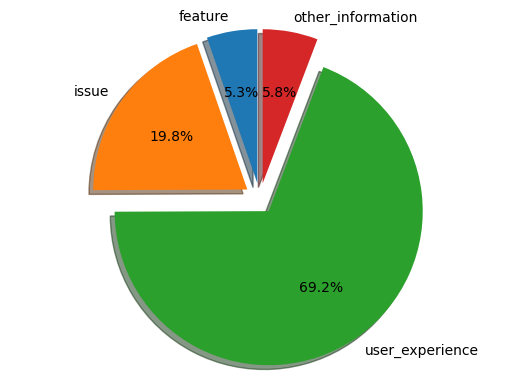

In [18]:
labels  = Emotions = 'feature', 'issue','user_experience','other_information'
sizes =[641,2388,8359,699]
explode =(0.1,0.1,0.1,0.1) 
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels =labels , autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [19]:
#labels  = Emotions = 'Compatibility and Device Issues','Customer Support and Responsiveness','Functionality and Features','Performance and Stability','Security and Privacy Concerns','User Interface and UX'
#sizes =[979,573,1165,2209,94,487]
#explode =(0.1,0.1,0.1,0.2,0.1,0.1) 
#fig1, ax1 = plt.subplots()
#ax1.pie(sizes, explode=explode, labels =labels , autopct='%1.1f%%',
    #    shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.show()

In [20]:
#!pip install spacy

## clean_text
clean the text by removing special characters, punctuations, etc.

In [23]:
import spacy
from bs4 import BeautifulSoup

# Load the English tokenizer, tagger, parser, NER, and word vectors
nlp = spacy.load("en_core_web_sm")

# Modify the stop words list as necessary (e.g., add or remove specific words)
# For this example, we'll simply use spacy's default stop words
STOPWORDS = nlp.Defaults.stop_words

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text  # HTML decoding
    doc = nlp(text, disable=["parser", "ner"])  # Tokenization (and optionally disable unnecessary components)
    
    # Convert tokens to lowercase (if they're not punctuation) and remove stop words
    tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop]
    
    # Join the tokens back into a single string
    return ' '.join(tokens)

# Example
text = "<p>This is a sample text with some @random, symbols; and stopwords like 'the', 'and'.</p>"
print(clean_text(text))




sample text @random symbols stopwords like


In [24]:
#import spacy

# Load the English tokenizer, tagger, parser, NER, and word vectors
#nlp = spacy.load("en_core_web_sm")


In [25]:
#!pip install spacy
#!pip install lxml
#import sys
#print(sys.executable)
#!pip install lxml
#!pip install spacy


In [26]:
#!python -m spacy download en_core_web_sm
#!pip install nltk


In [27]:
# Text Pre-processing (text cleaning techniques)
from bs4 import BeautifulSoup
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nekdilkhan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
def print_plot(index):
    example = df[df.index == index][['Base_Reviews', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('category:', example[1])
print_plot(1)

It's free to download the app, but if you want to actually use it, you need to upgrade to premium for $4.99. It's not free. I installed it, ran the setup wizard, gave it access to the printer and my files to find out I have to upgrade at a cost, to actually use it.  I am uninstalling frim my Kindle Fire as soon as I finish posting this review.
category: feature


In [29]:
# We want to show a look a Clean text and lables as you wanna.(After text_Preprocessing)
df['Base_Reviews'] = df['Base_Reviews'].astype(str).apply(clean_text)
print_plot(1) # 4567

free download app want actually use need upgrade premium 499 free installed ran setup wizard gave access printer files find upgrade cost actually use uninstalling frim kindle fire soon finish posting review
category: feature


In [30]:
def clean_text(text):
    """ clean the text by removing special characters, punctuations, etc. """
    text = text.lower()
    remove_xx_seq  = re.compile('xx+')
    replace_by_space = re.compile('[/(){}\[\]\|@,;]')
    remove_special_characters = re.compile('[^0-9a-z +]')
    remove_extra_space = re.compile('[^A-Za-z0-9]+')
    remove_numbers = re.compile('[0-9]+')
    text = re.sub(remove_xx_seq, ' ', text)
    text = re.sub(replace_by_space, ' ', text)
    text = re.sub(remove_special_characters, ' ', text)
    text = re.sub(remove_numbers, ' ', text)
    text = re.sub(remove_extra_space, ' ', text)
    return text.strip()

## preprocess_corpus
Preprocess the entire corpus including cleaning the text documents and return the updated dataframe.

In [31]:
def preprocess_corpus(df, column='text'):
    """ Preprocess the entire corpus including cleaning the text documents and return the updated dataframe. """
    df[column] = df[column].apply(clean_text)
    return df

## Encode_labels
Encode the class labels into a numbers.

In [32]:
def encode_labels(labels):
    """ Encode the class labels into a numbers. """
    label_encoder = preprocessing.LabelEncoder()
    label_encoder.fit(labels)
    #label_encoder.get_vocabulary()
    return label_encoder


## Compute_tfidf
 Calculate the tfidf features for all the text documents and return a (documents, fatures) matrix. 

In [33]:
def compute_tfidf(corpus, stop_words='english', ngram_range=(1, 1), max_features=None):
    """ Calculate the tfidf features for all the text documents and return a (documents, fatures) matrix. """
    vectorizer = TfidfVectorizer(input='content', stop_words=stop_words, ngram_range=ngram_range, min_df=3, max_df=0.9, max_features=max_features)
    print('Computing tfidf features...', end='')
    X = vectorizer.fit_transform(corpus)
    print('done!')
    return X, vectorizer

## Count Vectorizer

In [34]:
# def compute_count(corpus, stop_words='english', ngram_range=(1, 1), max_features=None):
#     """ Calculate the Count Vectorizer features for all the text documents and return a (documents, fatures) matrix. """
#     vectorizer = CountVectorizer(input='content', stop_words=stop_words, ngram_range=ngram_range, min_df=3, max_df=0.9, max_features=max_features)
#     print('Computing tfidf features...', end='')
#     X = vectorizer.fit_transform(corpus)
#     print('done!')
#     return X, vectorizer

## Train_test_model
Train and test the model using the training and test data sets. Return the predictions, accuracy and metric reports.

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
alg_accuracy= []
alg_p_r_f_score =[]

def train_test_model(model, X_train, X_test, y_train, y_test,labels):
    """ Train and test the model using the training and test data sets. Return the predictions, accuracy and metric reports. """
    print('Start training...', end='')
    model.fit(X_train, y_train)
    print('done!')
    print('Start testing...', end='')
    predictions = model.predict(X_test)
    accuracy = model.score(X_test, y_test)
    ####javed####
    alg_accuracy= accuracy_score(predictions, y_test)
    alg_p_r_f_score = precision_recall_fscore_support(y_test,predictions, average=None)
     ####javed####
    f1score = f1_score(y_test, predictions, average='weighted', pos_label=4)
    confusionMatrix = confusion_matrix(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted', pos_label=4)
    precision = precision_score(y_test, predictions, average='weighted', pos_label=4)
    metrics_report = classification_report(y_test, predictions, target_names=labels)
#    precision, recall, fscore, train_support = score(y_test, predictions, average='weighted')
    print('done!')
    return predictions, accuracy, precision, recall, f1score, alg_accuracy, alg_p_r_f_score
    #return  predictions, accuracy, tpr, fpr

Number of categories:  ['feature' 'issue' 'user_experience' 'other_information']



<Axes: title={'center': 'Categories vs Number of reviews'}, xlabel='category'>

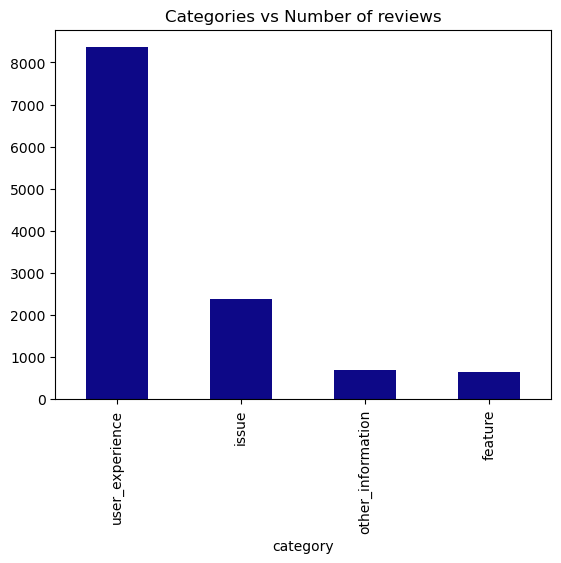

In [36]:
categories = df.category.unique()
print('Number of categories: ', categories)
print()
df.category.value_counts().plot(kind='bar', title='Categories vs Number of reviews', cmap='plasma')

# Setting for model TFIDF Features

In [37]:
# Create tfidf features from the text
stop_words    = 'english'
ngram_range   = (1, 1)
max_features  = None
X, vectorizer = compute_tfidf(df['Base_Reviews'].apply(lambda x: np.str_(x)), stop_words, ngram_range, max_features)
#X, vectorizer = compute_count(df['Base_Reviews'].apply(lambda x: np.str_(x)), stop_words, ngram_range, max_features)

# Encode the labels
labels = df.category.unique()
label_encoder = encode_labels(labels)
y = label_encoder.transform(df.category)
print(X)
print(vectorizer)
print(y)

Computing tfidf features...done!
  (0, 1594)	0.19928029685404522
  (0, 1519)	0.18935707924809772
  (0, 2671)	0.09972625228630362
  (0, 2729)	0.14423800639218864
  (0, 734)	0.12231229582379144
  (0, 2797)	0.1040403514059263
  (0, 686)	0.17527123048932028
  (0, 1068)	0.14963245624639093
  (0, 2640)	0.19065771045965554
  (0, 2696)	0.16984579799170046
  (0, 1869)	0.20435179923629226
  (0, 1257)	0.16408204458619688
  (0, 1631)	0.17318682646463077
  (0, 2160)	0.17099811766106238
  (0, 727)	0.20504831908801274
  (0, 1739)	0.17991448662484058
  (0, 1891)	0.12386356179066135
  (0, 2602)	0.14068663946185744
  (0, 774)	0.11160607071488544
  (0, 1894)	0.12593235235720385
  (0, 2237)	0.19248140285642668
  (0, 1906)	0.16562242761532645
  (0, 1259)	0.17636847176307963
  (0, 2597)	0.18252603730753536
  (0, 993)	0.24346410237760427
  :	:
  (12078, 152)	0.11298281043431292
  (12079, 2802)	0.7024853253314552
  (12079, 1028)	0.5615039430396319
  (12079, 734)	0.43729588340722486
  (12080, 1121)	1.0
  (1208

## Import Oversampling and Under-sampling methods

In [38]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import cross_val_score
sm = SMOTE()
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable

In [39]:
skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=123)

In [40]:
import sklearn
print(sklearn.__version__)


1.2.2


In [41]:
!pip install --upgrade scikit-learn



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 710.8 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [42]:
import sklearn
print(sklearn.__version__)


1.2.2


In [43]:
import numpy as np
import time
from scipy import interp
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, recall_score, precision_score, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming skfold, sm, train_test_model, X, y, and labels are defined elsewhere in your code

nb_model = MultinomialNB()

accs = []
f1 = []
pr = []
re = []
accuracy_ = []
P_r_f = []
roc_auc_one = []
tprs_one_nb = []
mean_fpr = np.linspace(0, 1, 100)

st_time = time.time()

for train_index, test_index in skfold.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    predictions, accuracy, precision, recall, f1score, alg_accuracy, alg_p_r_f_score = train_test_model(nb_model, X_train_res, X_test, y_train_res, y_test, labels)

    fpr_one, tpr_one, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:, 3], pos_label=3)
    tprs_one_nb.append(interp(mean_fpr, fpr_one, tpr_one))
    roc_auc_one.append(auc(fpr_one, tpr_one))

    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    accs.append(accuracy)
    f1.append(f1score)
    pr.append(precision)
    re.append(recall)

en_time = time.time()

print('Total time: {:.2f}s'.format(en_time - st_time))
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 score: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

mean_tpr = np.mean(tprs_one_nb, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
print('Mean AUC: {:.2f}'.format(mean_auc))

mean_accuracy = np.mean(accuracy_, axis=0)
print("The average accuracy of MNB is", mean_accuracy)

mean_p_r_f = np.mean(P_r_f, axis=0)
print("The precision, recall, f are", mean_p_r_f)

unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))

#plot_confusion_matrix(nb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")
#plt.show()


Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 2.77s
mean accuracy: 0.67 %
mean f1 score: 0.69 %
mean precision: 0.76 %
mean recall: 0.67 %
Mean AUC: 0.83
The average accuracy of MNB is 0.665589275248002
The precision, recall, f are [[2.89464786e-01 5.08522921e-01 4.53443368e-01 8.99996217e-01]
 [7.22283654e-01 7.31989030e-01 7.29585921e-01 6.36918746e-01]
 [4.12887798e-01 6.00056333e-01 5.58383858e-01 7.45907563e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
[(0, 7523), (1, 7523), (2, 7523), (3, 7523)]


In [44]:
#!pip install --upgrade scikit-learn


# Oversampling

### MultinomialNB

In [45]:
from scipy import interp
nb_model = MultinomialNB()
from sklearn.metrics import f1_score, recall_score,precision_score

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []
#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
#n1 roc_auc_four = []

tprs_zero_nb = []
tprs_one_nb = []
tprs_two_nb = []
tprs_three_nb = []
#n1 tprs_four_nb = []

mean_fpr = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre,alg_accuracy, alg_p_r_f_score  = train_test_model(nb_model, X_train_res, X_test, y_train_res, y_test, labels)
    #print("the accuracy is",alg_accuracy)
    #break
   # fpr_zero, tpr_zero, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,3], pos_label=3)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=3)
    #fpr_four, tpr_four, _____ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=4)
    
    tprs_one_nb.append(interp(mean_fpr, fpr_one, tpr_one))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    #roc_auc_four = (auc(fpr_four, tpr_four))
    
    #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
      
en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four = sum(roc_auc_four) / len(roc_auc_four)
#print("\nROC across folds for four: ", roc_four)

mean_tpr = np.mean(tprs_one_nb, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of MNB is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr)
#print(mean_fpr)
print(mean_auc)
#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(nb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 1.16s
mean accuracy: 0.67 %
mean f1 socre: 0.69 %
mean precision: 0.77 %
mean recall: 0.67 %
the average accuracy of MNB is 0.6670793414731675
the presion, recall, f are [[2.94690345e-01 5.09881133e-01 4.54686737e-01 9.00928656e-01]
 [7.28509615e-01 7.37423086e-01 7.33892340e-01 6.36679798e-01]
 [4.19219592e-01 6.02693202e-01 5.60638985e-01 7.46047380e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
0.8349160218866445
[(0, 7523), (1, 7523), (2, 7523), (3, 7523)]


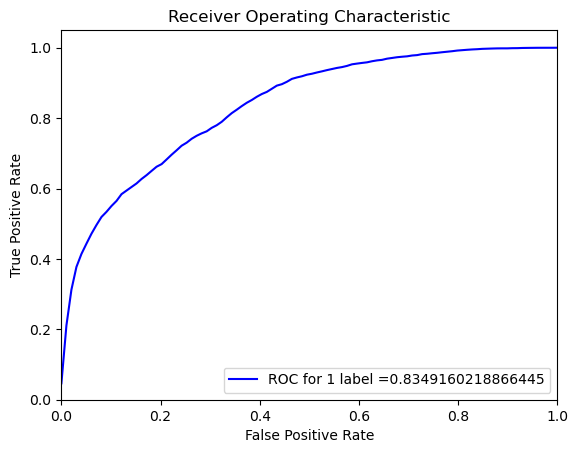

In [46]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(mean_fpr, mean_tpr, 'b', label= "ROC for 1 label =" +str(mean_auc))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LogisticRegression

In [47]:
log_model = LogisticRegression(penalty='l2', max_iter=500)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(log_model, X_train, X_test, y_train, y_test, labels)
    
    fpr_zero, tpr_zero, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
     #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of LR is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(log_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 3.48s
mean accuracy: 0.80 %
mean f1 socre: 0.78 %
mean precision: 0.79 %
mean recall: 0.80 %

ROC across folds for zero:  0.5271185664247577

ROC across folds for one:  0.8866850413389102

ROC across folds for two:  0.2624458821973001

ROC across folds for three:  0.26689934133207516

ROC across folds for four:  nan
the average accuracy of LR is 0.7973025158989697
the presion, recall, f are [[9.58186081e-01 7.05018320e-01 7.65042590e-01 8.08889903e-01]
 [4.66418269e-01 4.71099821e-01 4.77867495e-01 9.42576569e-01]
 [6.26888719e-01 5

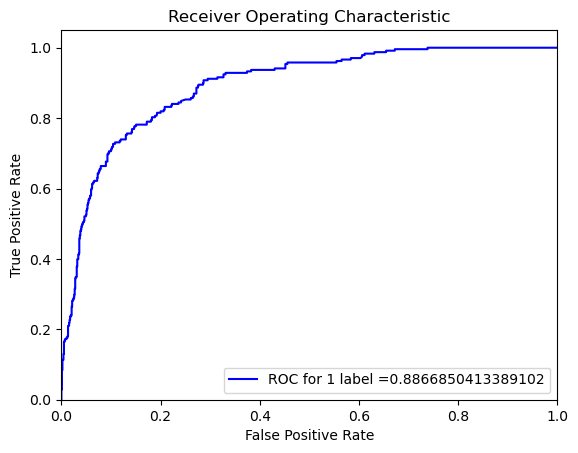

In [48]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LinearSVC

In [49]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_svm = []

tprs_zero_svm = []
tprs_one_svm = []
tprs_two_svm = []
tprs_three_svm = []
tprs_four_svm = []

mean_fpr_svm = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(svm, X_train_res, X_test, y_train_res, y_test, labels)
    
    #fpr_zero, tpr_zero, _ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=3)
    fpr_four_svm, tpr_four_svm, _____ = roc_curve(y_test, svm.decision_function (X_test)[:,3], pos_label=3)

    tprs_four_svm.append(interp(mean_fpr_svm, fpr_four_svm, tpr_four_svm))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_svm, tpr_four_svm))
    
    
     #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_svm = sum(roc_auc_four_svm) / len(roc_auc_four_svm)
#print("\nROC across folds for four: ", roc_four_svm)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of LSV is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

mean_tpr_svm = np.mean(tprs_four_svm, axis=0)
mean_auc_svm = auc(mean_fpr_svm, mean_tpr_svm)

#print(mean_tpr_svm)
#print(mean_fpr_svm)
#print(mean_auc_svm)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(svm, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 0.62s
mean accuracy: 0.77 %
mean f1 socre: 0.78 %
mean precision: 0.83 %
mean recall: 0.77 %
the average accuracy of LSV is 0.7661882596859098
the presion, recall, f are [[6.33918613e-01 5.94472093e-01 4.55937386e-01 9.42955592e-01]
 [9.01706731e-01 8.44601104e-01 8.88364389e-01 7.23171934e-01]
 [7.43938083e-01 6.97651058e-01 6.02083107e-01 8.18473168e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
[(0, 7523), (1, 7523), (2, 7523), (3, 7523)]


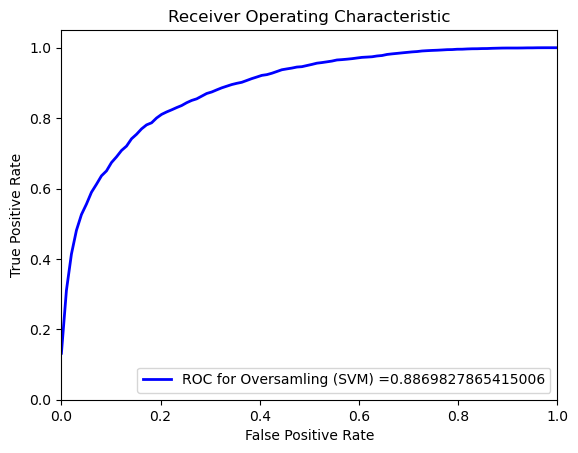

In [50]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_svm, mean_tpr_svm, 'b', label= "ROC for Oversamling (SVM) =" +str(mean_auc_svm),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RandomForestClassifier

In [51]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_rf = []

tprs_zero_rf = []
tprs_one_rf = []
tprs_two_rf = []
tprs_three_rf = []
tprs_four_rf = []

mean_fpr_rf = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #Oversampling
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(rf_model, X_train_res, X_test, y_train_res, y_test, labels)
    
    #fpr_zero, tpr_zero, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_rf, tpr_four_rf, _____ = roc_curve(y_test, rf_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_rf.append(interp(mean_fpr_rf, fpr_four_rf, tpr_four_rf))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_rf, tpr_four_rf))
    
        #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_rf = sum(roc_auc_four_rf) / len(roc_auc_four_rf)
#print("\nROC across folds for four: ", roc_four_rf)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of RF is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


mean_tpr_rf = np.mean(tprs_four_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)

#print(mean_tpr_rf)
#print(mean_fpr_rf)
#print(mean_auc_rf)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(rf_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 8.11s
mean accuracy: 0.90 %
mean f1 socre: 0.91 %
mean precision: 0.92 %
mean recall: 0.90 %
the average accuracy of RF is 0.9031892429296831
the presion, recall, f are [[9.28121175e-01 9.06169384e-01 5.42874326e-01 9.61964514e-01]
 [9.18822115e-01 8.76377413e-01 9.35610766e-01 9.06925766e-01]
 [9.22281764e-01 8.90683465e-01 6.80011592e-01 9.33389202e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
[(0, 7523), (1, 7523), (2, 7523), (3, 7523)]


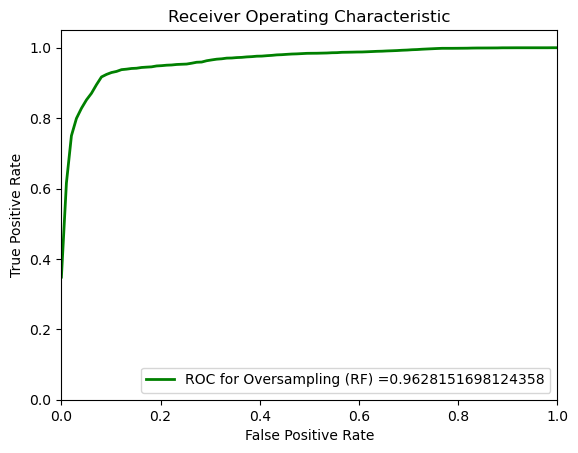

In [52]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_one, tpr_one, 'b', color='red', label= "Oversampling =" +str(roc_one))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_rf, mean_tpr_rf, 'b', color='green', label= "ROC for Oversampling (RF) =" +str(mean_auc_rf),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNN

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=3)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()

mean_fpr_rf = np.linspace(0,1,100)              # change the name of classifier

for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(knn_model, X_train, X_test, y_train, y_test, labels)
    
    fpr_zero, tpr_zero, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, knn_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
            #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of KNN is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


mean_tpr_rf = np.mean(tprs_four_rf, axis=0)
mean_auc_rf = auc(mean_fpr_rf, mean_tpr_rf)

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(knn_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 7.44s
mean accuracy: 0.74 %
mean f1 socre: 0.70 %
mean precision: 0.72 %
mean recall: 0.74 %

ROC across folds for zero:  0.4719296355740015

ROC across folds for one:  0.6264326268486435

ROC across folds for two:  0.44544838244046525

ROC across folds for three:  0.4265691766161036

ROC across folds for four:  nan
the average accuracy of KNN is 0.7393886360026074
the presion, recall, f are [[7.06283058e-01 6.45942912e-01 6.32951704e-01 7.53501347e-01]
 [3.32235577e-01 2.09386098e-01 5.39068323e-01 9.38749248e-01]
 [4.50411096e-01 

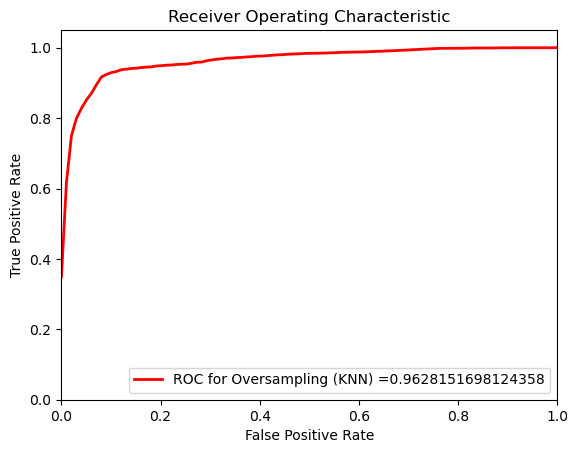

In [54]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.plot(mean_fpr_rf, mean_tpr_rf, 'b', color='red', label= "ROC for Oversampling (KNN) =" +str(mean_auc_rf),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Multilayer Perceptron

In [55]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []

tprs_zero_mlp = []
tprs_one_mlp = []
tprs_two_mlp = []
tprs_three_mlp = []
tprs_four_mlp = []

mean_fpr_mlp = np.linspace(0,1,100)


st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(mlp_model, X_train_res, X_test, y_train_res, y_test, labels)
    
    #fpr_zero, tpr_zero, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_mlp, tpr_four_mlp, _____ = roc_curve(y_test, mlp_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_mlp.append(interp(mean_fpr_mlp, fpr_four_mlp, tpr_four_mlp))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_mlp, tpr_four_mlp))
    
        
            #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four = sum(roc_auc_four) / len(roc_auc_four)
#print("\nROC across folds for four: ", roc_four)
mean_tpr_mlp = np.mean(tprs_four_mlp, axis=0)
mean_auc_mlp = auc(mean_fpr_mlp, mean_tpr_mlp)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of MLP is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_mlp)
#print(mean_fpr_mlp)
print(mean_auc_mlp)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(mlp_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 503.52s
mean accuracy: 0.93 %
mean f1 socre: 0.93 %
mean precision: 0.94 %
mean recall: 0.93 %
the average accuracy of MLP is 0.9261063546579462
the presion, recall, f are [[8.97161128e-01 9.24880668e-01 6.09768597e-01 9.74045421e-01]
 [9.43798077e-01 9.20727119e-01 9.45693582e-01 9.24634559e-01]
 [9.18782657e-01 9.22751262e-01 7.40749751e-01 9.48599800e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
0.9780501053339354
[(0, 7523), (1, 7523), (2, 7523), (3, 7523)]


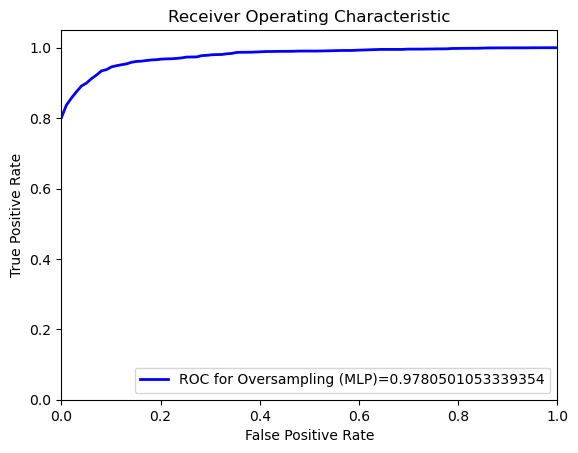

In [56]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_one, tpr_one, 'b', color='green', label= "Oversampling =" +str(roc_one))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_mlp, mean_tpr_mlp, 'b', label= "ROC for Oversampling (MLP)=" +str(mean_auc_mlp),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting Classifier

In [57]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    #X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, precision, recall, f1socre, alg_accuracy, alg_p_r_f_score = train_test_model(gb_model, X_train, X_test, y_train, y_test, labels)
    
    fpr_zero, tpr_zero, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, gb_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of GB is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(gb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 22.64s
mean accuracy: 0.79 %
mean f1 socre: 0.78 %
mean precision: 0.79 %
mean recall: 0.79 %

ROC across folds for zero:  0.26899318622441337

ROC across folds for one:  0.8495666069986086

ROC across folds for two:  0.22511450423087295

ROC across folds for three:  0.3647816067201914

ROC across folds for four:  nan
the average accuracy of GB is 0.7945721657108114
the presion, recall, f are [[8.80086515e-01 6.89051354e-01 7.78872514e-01 8.08580975e-01]
 [6.05384615e-01 4.43876798e-01 5.07867495e-01 9.33245566e-01]
 [7.16601758e-01

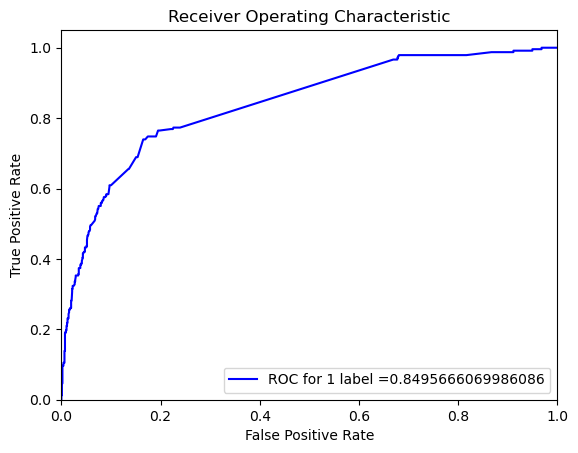

In [58]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Ensemble Methods
Ensemble methods are techniques that create multiple models and then combine them to produce improved results. 

### Voting Classifier

In [59]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)

vote_model = VotingClassifier(estimators=[('mlp', mlp_model),('mlp1', mlp_model)], voting='soft')

accs = []
reports = []
f1 = []
pr = []
re =[]

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

#
roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []

tprs_zero_v = []
tprs_one_v = []
tprs_two_v = []
tprs_three_v = []
tprs_four_v = []

mean_fpr_v = np.linspace(0,1,100)
#
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    # X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(vote_model, X_train, X_test, y_train, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    fpr_four_v, tpr_four_v, _____ = roc_curve(y_test, vote_model.predict_proba (X_test)[:,3], pos_label=3)     #
    tprs_four_v.append(interp(mean_fpr_v, fpr_four_v, tpr_four_v))                                             #
    roc_auc_four = (auc(fpr_four_v, tpr_four_v))                                                               #
    

    
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time)) 
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#
mean_tpr_v = np.mean(tprs_four_v, axis=0)
mean_auc_v = auc(mean_fpr_v, mean_tpr_v)
#
#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of Voting is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(vote_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 391.77s
mean accuracy: 0.78 %
mean f1 socre: 0.77 %
mean precision: 0.78 %
mean recall: 0.77 %
the average accuracy of Voting is 0.7750469026451723
the presion, recall, f are [[6.54073019e-01 6.01822618e-01 6.09863569e-01 8.40691532e-01]
 [6.11466346e-01 5.51482015e-01 5.65093168e-01 8.69005243e-01]
 [6.29670270e-01 5.75096751e-01 5.85086854e-01 8.54542122e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
[(0, 577), (1, 2150), (2, 629), (3, 7523)]


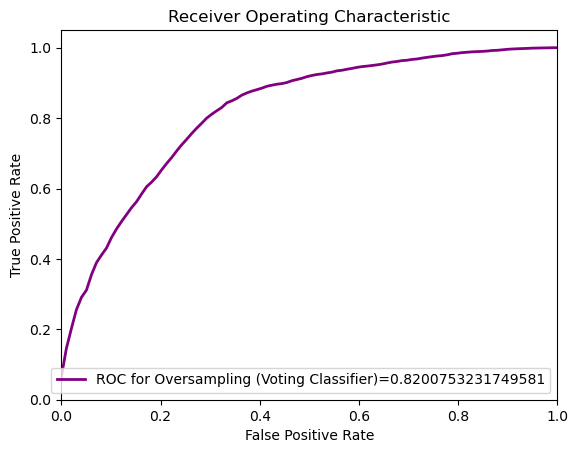

In [60]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_v, mean_tpr_v, 'b', color='purple', label= "ROC for Oversampling (Voting Classifier)=" +str(mean_auc_v),lw=2, alpha=1)
plt.legend(loc = 'lower right')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### AdaBoost
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data.

In [61]:
ada_model = AdaBoostClassifier(n_estimators=500)

accs = []
reports = []
f1 = []
pr = []
re =[]

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Oversample
    # X_train_res, y_train_res = sm.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(ada_model, X_train, X_test, y_train, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    
        
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time)) 
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of AdaBoost is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

unique, counts = np.unique(y_train, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(ada_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 44.44s
mean accuracy: 0.67 %
mean f1 socre: 0.68 %
mean precision: 0.67 %
mean recall: 0.67 %
the average accuracy of AdaBoost is 0.6691485355419344
the presion, recall, f are [[6.67612418e-01 4.61302884e-01 3.30714553e-01 7.78207028e-01]
 [3.27500000e-01 4.81588200e-01 5.02132505e-01 7.62891012e-01]
 [4.36078046e-01 4.70677405e-01 3.94604463e-01 7.70297732e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
[(0, 577), (1, 2150), (2, 629), (3, 7523)]


# Undersampling

### MultinomialNB

In [62]:
nb_model = MultinomialNB()

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(nb_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, nb_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, nb_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
                 #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of NBM is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(nb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 0.09s
mean accuracy: 0.59 %
mean f1 socre: 0.75 %
mean precision: 0.59 %
mean recall: 0.63 %

ROC across folds for zero:  0.36710638826868475

ROC across folds for one:  0.8397995851302902

ROC across folds for two:  0.17154890757471747

ROC across folds for three:  0.36264770646114636

ROC across folds for four:  nan
the average accuracy of NBM is 0.5935282566184082
the presion, recall, f are [[2.30601469e-01 4.75722794e-01 3.52752653e-01 9.01931879e-01]
 [8.00312500e-01 6.58695194e-01 7.45258799e-01 5.46354611e-01]
 [3.57756592e-0

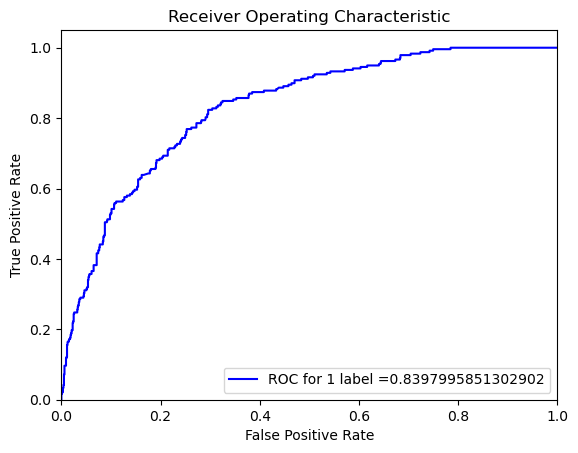

In [63]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LogisticRegression

In [64]:
log_model = LogisticRegression(penalty='l2', max_iter=500)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(log_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, log_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
                     #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####


    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of LR is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(log_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 1.41s
mean accuracy: 0.67 %
mean f1 socre: 0.75 %
mean precision: 0.67 %
mean recall: 0.69 %

ROC across folds for zero:  0.34496975060545776

ROC across folds for one:  0.8376954711835409

ROC across folds for two:  0.18016456646125784

ROC across folds for three:  0.3672117312074259

ROC across folds for four:  nan
the average accuracy of LR is 0.6655896176030762
the presion, recall, f are [[4.06815388e-01 4.70844345e-01 3.97869753e-01 8.89763370e-01]
 [7.58076923e-01 7.01016139e-01 7.29565217e-01 6.43016933e-01]
 [5.29065108e-01 

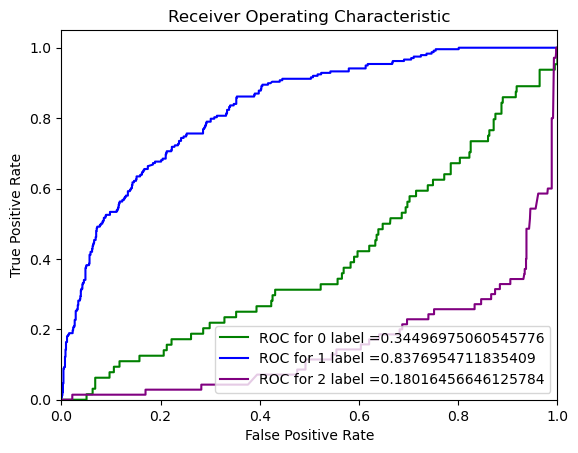

In [65]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### LinearSVC

In [66]:
svm = LinearSVC(class_weight='balanced', verbose=False, max_iter=10000, tol=1e-4, C=0.1)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_svm = []

tprs_zero_svm_under = []
tprs_one_svm_under = []
tprs_two_svm_under = []
tprs_three_svm_under = []
tprs_four_svm_under = []

mean_fpr_svm_under = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(svm, X_train_under, X_test, y_train_under, y_test, labels)

    #fpr_zero, tpr_zero, _ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=0)
    #fpr_one, tpr_one, __ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, svm.decision_function(X_test)[:,1], pos_label=3)
    fpr_four_under_svm, tpr_four_under_svm, _____ = roc_curve(y_test, svm.decision_function (X_test)[:,3], pos_label=3)

    tprs_four_svm_under.append(interp(mean_fpr_svm_under, fpr_four_under_svm, tpr_four_under_svm))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_under_svm, tpr_four_under_svm))
    
                         #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####


    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one = sum(roc_auc_one) / len(roc_auc_one)
#print("\nROC across folds for one: ", roc_one)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_under_svm = sum(roc_auc_four_svm) / len(roc_auc_four_svm)
#print("\nROC across folds for four: ", roc_four_under_svm)

mean_tpr_svm_under = np.mean(tprs_four_svm_under, axis=0)
mean_auc_svm_under = auc(mean_fpr_svm_under, mean_tpr_svm_under)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of SVC is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_svm_under)
#print(mean_fpr_svm_under)
print(mean_auc_svm_under)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(svm, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 0.12s
mean accuracy: 0.64 %
mean f1 socre: 0.75 %
mean precision: 0.64 %
mean recall: 0.67 %
the average accuracy of SVC is 0.6447413575885057
the presion, recall, f are [[3.96698975e-01 4.61237300e-01 3.60157928e-01 8.94377852e-01]
 [7.67451923e-01 7.19440245e-01 7.48178054e-01 6.05335501e-01]
 [5.22481647e-01 5.61893413e-01 4.85857443e-01 7.21962428e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
0.8030252675855519
[(0, 7523), (1, 7523), (2, 7523), (3, 7523)]


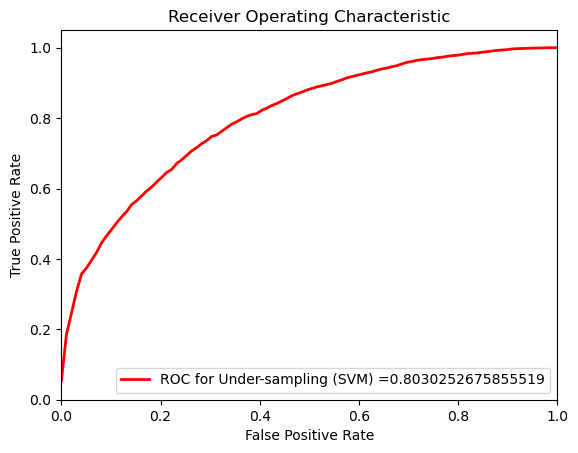

In [67]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_svm_under, mean_tpr_svm_under, 'b', color='red', label= "ROC for Under-sampling (SVM) =" +str(mean_auc_svm_under) ,lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### RandomForestClassifier

In [68]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_under = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_under = []

tprs_zero_rf_under = []
tprs_one_rf_under = []
tprs_two_rf_under = []
tprs_three_rf_under = []
tprs_four_rf_under = []

mean_fpr_rf_under = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(rf_model, X_train_under, X_test, y_train_under, y_test, labels)

    #fpr_zero, tpr_zero, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_under, tpr_under, __ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_under_rf, tpr_four_under_rf, _____ = roc_curve(y_test, rf_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_rf_under.append(interp(mean_fpr_rf_under, fpr_four_under_rf, tpr_four_under_rf))
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    roc_auc_four = (auc(fpr_four_rf, tpr_four_rf))
    
                             #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_one_under = sum(roc_auc_under) / len(roc_auc_under)
#print("\nROC across folds for one: ", roc_one_under)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_four_under_rf = sum(roc_auc_four_under) / len(roc_auc_four_under)
#print("\nROC across folds for four: ", roc_four_under_rf)

mean_tpr_rf_under = np.mean(tprs_four_rf_under, axis=0)
mean_auc_rf_under = auc(mean_fpr_rf_under, mean_tpr_rf_under)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of RF is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_rf_under)
#print(mean_fpr_rf_under)
print(mean_auc_rf_under)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(rf_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 2.14s
mean accuracy: 0.68 %
mean f1 socre: 0.76 %
mean precision: 0.68 %
mean recall: 0.70 %
the average accuracy of RF is 0.6834590461165979
the presion, recall, f are [[3.86617805e-01 5.02375723e-01 4.19439404e-01 8.83782745e-01]
 [7.58100962e-01 6.61233782e-01 7.26790890e-01 6.80467009e-01]
 [5.11240770e-01 5.70372673e-01 5.29628923e-01 7.68422721e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
0.8275735216273754
[(0, 7523), (1, 7523), (2, 7523), (3, 7523)]


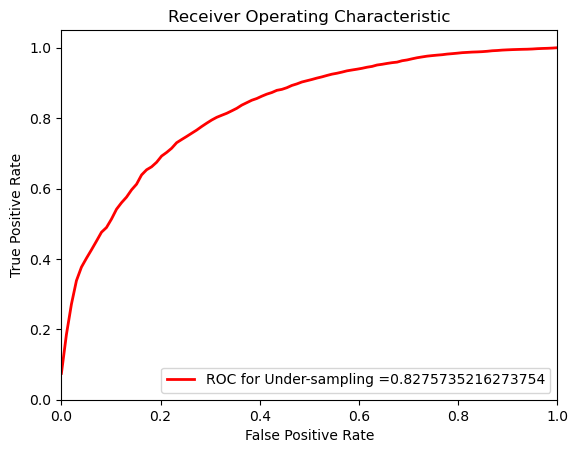

In [69]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_under, tpr_under, 'b', label= "Under-sampling =" +str(roc_one_under))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_rf_under, mean_tpr_rf_under, 'b', color='red', label= "ROC for Under-sampling =" +str(mean_auc_rf_under),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### KNN

In [70]:
knn_model = KNeighborsClassifier(n_neighbors=3)
accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    X_train_under, y_train_under = rus.fit_resample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(knn_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, knn_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
    #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of KNN is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(knn_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 2.69s
mean accuracy: 0.21 %
mean f1 socre: 0.74 %
mean precision: 0.21 %
mean recall: 0.24 %

ROC across folds for zero:  0.4598289875643336

ROC across folds for one:  0.5712546984746703

ROC across folds for two:  0.4371669772651262

ROC across folds for three:  0.47255046143326285

ROC across folds for four:  nan
the average accuracy of KNN is 0.2117967342064757
the presion, recall, f are [[8.54168799e-02 4.02522192e-01 2.89326603e-01 9.26808079e-01]
 [8.48437500e-01 1.17682219e-01 7.38136646e-01 1.45834026e-01]
 [1.47423024e-01 

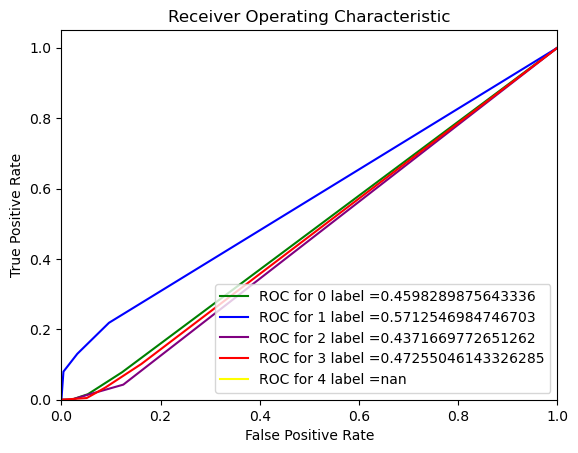

In [71]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### MLPClassifier

In [72]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)
accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
roc_auc_ = []
roc_auc_one_under = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four_mlp = []

tprs_zero_mlp_under = []
tprs_one_mlp_under = []
tprs_two_mlp_under = []
tprs_three_mlp_under = []
tprs_four_mlp_under = []

mean_fpr_mlp_under = np.linspace(0,1,100)

st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(mlp_model, X_train_under, X_test, y_train_under, y_test, labels)

    #fpr_zero, tpr_zero, _ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=0)
    #fpr_one_under, tpr_one_under, __ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=1)
    #fpr_two, tpr_two, ___ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=2)
    #fpr_three, tpr_three, ____ = roc_curve(y_test, mlp_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four_mlp_under, tpr_four_mlp_under, _____ = roc_curve(y_test, mlp_model.predict_proba (X_test)[:,3], pos_label=3)

    tprs_four_mlp_under.append(interp(mean_fpr_mlp_under, fpr_four_mlp_under, tpr_four_mlp_under))
    
        #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####
    
    #roc_auc_one = (auc(fpr_zero, tpr_zero))
    #roc_auc_one = (auc(fpr_one, tpr_one))
    #roc_auc_two = (auc(fpr_two, tpr_two))
    #roc_auc_three = (auc(fpr_three, tpr_three))
    #roc_auc_four = (auc(fpr_four_mlp_under, tpr_four_mlp_under))

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#roc_zero = sum(roc_auc_) / len(roc_auc_)
#print("\nROC across folds for zero: ", roc_zero)

#roc_mlp_under = sum(roc_auc_one_under) / len(roc_auc_one_under)
#print("\nROC across folds for one: ", roc_mlp_under)

#roc_two = sum(roc_auc_two) / len(roc_auc_two)
#print("\nROC across folds for two: ", roc_two)

#roc_three = sum(roc_auc_three) / len(roc_auc_three)
#print("\nROC across folds for three: ", roc_three)

#roc_mlp_under_four = sum(roc_auc_four_mlp) / len(roc_auc_four_mlp)
#print("\nROC across folds for four: ", roc_mlp_under_four)

mean_tpr_mlp_under = np.mean(tprs_four_mlp_under, axis=0)
mean_auc_mlp_under = auc(mean_fpr_mlp_under, mean_tpr_mlp_under)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of MLP is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(mean_tpr_mlp_under)
#print(mean_fpr_mlp_under)
print(mean_auc_mlp_under)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(mlp_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 64.54s
mean accuracy: 0.64 %
mean f1 socre: 0.77 %
mean precision: 0.64 %
mean recall: 0.67 %
the average accuracy of MLP is 0.6387797917385611
the presion, recall, f are [[3.02884405e-01 5.33981765e-01 3.47204226e-01 9.06906176e-01]
 [9.60937500e-01 6.16815513e-01 8.65527950e-01 6.01386700e-01]
 [4.60493236e-01 5.72281695e-01 4.95334401e-01 7.23087725e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
0.8221298245214723
[(0, 7523), (1, 7523), (2, 7523), (3, 7523)]


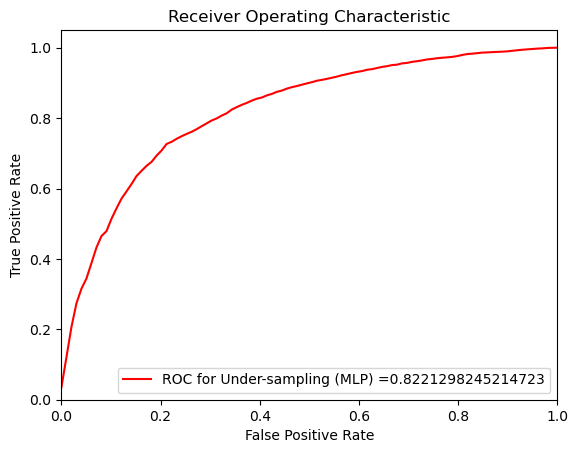

In [73]:
plt.title('Receiver Operating Characteristic')
#plt.plot(fpr_one_under, tpr_one_under, 'b', label= "Under-sampling =" +str(roc_mlp_under))
#plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
#plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
#plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
plt.plot(mean_fpr_mlp_under, mean_tpr_mlp_under, 'b', color='red', label= "ROC for Under-sampling (MLP) =" +str(mean_auc_mlp_under))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Gradient Boosting Classifier

In [74]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)

accs = []
reports = []
f1 = []
pr = []
re = []
pe = []

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

roc_auc_ = []
roc_auc_one = []
roc_auc_two = []
roc_auc_three = []
roc_auc_four = []
st_time = time.time()
for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(gb_model, X_train_under, X_test, y_train_under, y_test, labels)

    fpr_zero, tpr_zero, _ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=0)
    fpr_one, tpr_one, __ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=1)
    fpr_two, tpr_two, ___ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=2)
    fpr_three, tpr_three, ____ = roc_curve(y_test, gb_model.predict_proba(X_test)[:,1], pos_label=3)
    fpr_four, tpr_four, _____ = roc_curve(y_test, gb_model.predict_proba (X_test)[:,1], pos_label=4)

    roc_auc_.append(auc(fpr_zero, tpr_zero))
    roc_auc_one.append(auc(fpr_one, tpr_one))
    roc_auc_two.append(auc(fpr_two, tpr_two))
    roc_auc_three.append(auc(fpr_three, tpr_three))
    roc_auc_four.append(auc(fpr_four, tpr_four))
    
            #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####

    pe.append(predictions)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)


en_time = time.time()
#print('mean predictions: {:.2f} %'.format(sum(pe) / len(pe) ))
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

roc_zero = sum(roc_auc_) / len(roc_auc_)
print("\nROC across folds for zero: ", roc_zero)

roc_one = sum(roc_auc_one) / len(roc_auc_one)
print("\nROC across folds for one: ", roc_one)

roc_two = sum(roc_auc_two) / len(roc_auc_two)
print("\nROC across folds for two: ", roc_two)

roc_three = sum(roc_auc_three) / len(roc_auc_three)
print("\nROC across folds for three: ", roc_three)

roc_four = sum(roc_auc_four) / len(roc_auc_four)
print("\nROC across folds for four: ", roc_four)

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of GBC is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####

#print(fpr_zero)
#print(tpr_zero)

#print(metrics_report)
unique, counts = np.unique(y_train_res, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(gb_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 14.92s
mean accuracy: 0.71 %
mean f1 socre: 0.77 %
mean precision: 0.71 %
mean recall: 0.72 %

ROC across folds for zero:  0.26293126422803553

ROC across folds for one:  0.8244913622751422

ROC across folds for two:  0.22247611894583738

ROC across folds for three:  0.38554154728644363

ROC across folds for four:  nan
the average accuracy of GBC is 0.7088587114302773
the presion, recall, f are [[4.58547992e-01 5.61511328e-01 3.97470026e-01 8.86804958e-01]
 [9.25024038e-01 6.28567913e-01 8.36894410e-01 7.04510644e-01]
 [6.12264429e-

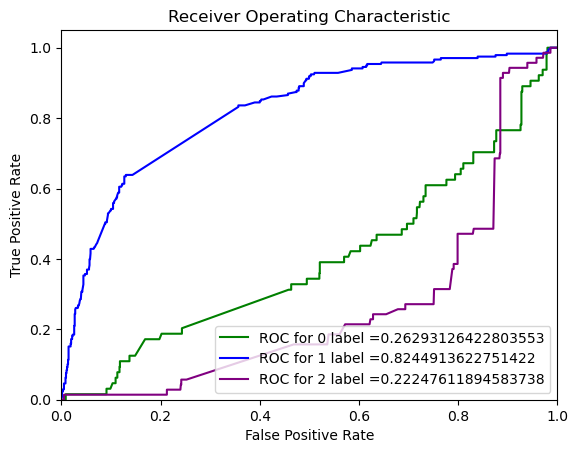

In [75]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr_zero, tpr_zero, 'b', color='green', label= "ROC for 0 label =" +str(roc_zero))
plt.plot(fpr_one, tpr_one, 'b', label= "ROC for 1 label =" +str(roc_one))
plt.plot(fpr_two, tpr_two, 'b', color='purple',  label= "ROC for 2 label =" +str(roc_two))
#plt.plot(fpr_three, tpr_three, 'b', color='red',  label= "ROC for 3 label =" +str(roc_three))
#plt.plot(fpr_four, tpr_four, 'b', color='yellow', label= "ROC for 4 label =" +str(roc_four))
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [77]:
#!pip install scikit-learn==1.2.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 679.5 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.2
    Uninstalling scikit-learn-1.4.2:
      Successfully uninstalled scikit-learn-1.4.2


## Ensemble Methods
Ensemble methods are techniques that create multiple models and then combine them to produce improved results.

### Voting Classifier

In [78]:
nb_model = MultinomialNB()
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)
log_model = LogisticRegression(penalty='l2', max_iter=500)

vote_model = VotingClassifier(estimators=[('nb', nb_model), ('rf', rf_model), ('log', log_model)], voting='hard')

accs = []
reports = []
f1 = []
pr = []
re =[]
#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###

st_time = time.time()

for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(vote_model, X_train_under, X_test, y_train_under, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    
                #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####
    
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))


#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of Voting Classifier is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####


unique, counts = np.unique(y_train_under, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(vote_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 20.73s
mean accuracy: 0.69 %
mean f1 socre: 0.79 %
mean precision: 0.69 %
mean recall: 0.71 %
the average accuracy of Voting Classifier is 0.6890851039937773
the presion, recall, f are [[3.46192312e-01 5.43988504e-01 4.43006632e-01 9.18329917e-01]
 [9.17235577e-01 7.22349777e-01 8.03975155e-01 6.52471278e-01]
 [5.02489357e-01 6.20433599e-01 5.71031749e-01 7.62756474e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
[(0, 577), (1, 577), (2, 577), (3, 577)]


### Ada Boost Classifier
The core principle of AdaBoost is to fit a sequence of weak learners (i.e., models that are only slightly better than random guessing, such as small decision trees) on repeatedly modified versions of the data.

In [79]:
ada_model = AdaBoostClassifier(n_estimators=500)

accs = []
reports = []
f1 = []
pr = []
re =[]

#javed#
accuracy_ = []
P_r_f = []

mean_accuracy= []
mean_p_r_f =[]
##javed###
st_time = time.time()

for train_index, test_index in skfold.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # Undersampling
    #X_train_under, y_train_under = rus.fit_sample(X_train, y_train)
    predictions, accuracy, f1socre, precision, recall, alg_accuracy, alg_p_r_f_score = train_test_model(ada_model, X_train_under, X_test, y_train_under, y_test, labels)
    accs.append(accuracy)
    f1.append(f1socre)
    pr.append(precision)
    re.append(recall)
    #reports.append(metrics_report)
    
    #javed###      
    accuracy_.append(alg_accuracy)
    P_r_f.append(alg_p_r_f_score)
    #### jave ####
    
    
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))   
print('mean accuracy: {:.2f} %'.format(np.mean(accs)))
print('mean f1 socre: {:.2f} %'.format(np.mean(f1)))
print('mean precision: {:.2f} %'.format(np.mean(pr)))
print('mean recall: {:.2f} %'.format(np.mean(re)))

#### jave ####
mean_accuracy= np.mean(accuracy_, axis=0)
print("the average accuracy of AdaBoost is",mean_accuracy)
    
mean_p_r_f=np.mean(P_r_f, axis=0)
print("the presion, recall, f are", mean_p_r_f)
#### jave ####
unique, counts = np.unique(y_train_under, return_counts=True)
print(list(zip(unique, counts)))
#plot_confusion_matrix(ada_model, X_test, y_test, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Start training...done!
Start testing...done!
Total time: 25.73s
mean accuracy: 0.61 %
mean f1 socre: 0.70 %
mean precision: 0.61 %
mean recall: 0.63 %
the average accuracy of AdaBoost is 0.6106549115628372
the presion, recall, f are [[2.89196748e-01 4.55328393e-01 3.30098664e-01 8.27080333e-01]
 [7.50336538e-01 5.21771386e-01 6.65217391e-01 6.20767699e-01]
 [4.17010174e-01 4.85985234e-01 4.40989598e-01 7.09112347e-01]
 [6.41000000e+01 2.38800000e+02 6.99000000e+01 8.35900000e+02]]
[(0, 577), (1, 577), (2, 577), (3, 577)]


# ROC Combine

### ROC for Random Forest

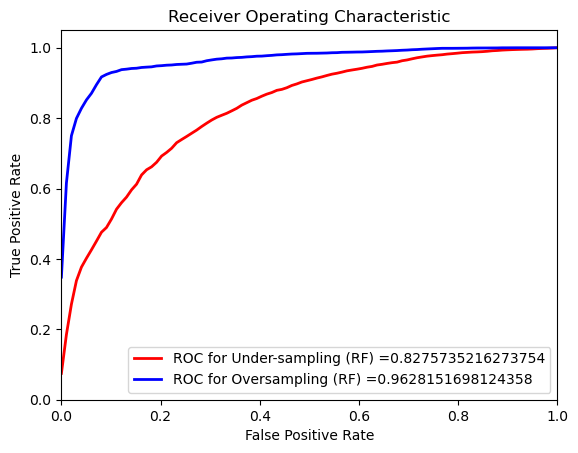

In [80]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_rf_under, mean_tpr_rf_under, 'b', color='red', label= "ROC for Under-sampling (RF) =" +str(mean_auc_rf_under),lw=2, alpha=1)
plt.plot(mean_fpr_rf, mean_tpr_rf, 'b', label= "ROC for Oversampling (RF) =" +str(mean_auc_rf),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ROC for MLP

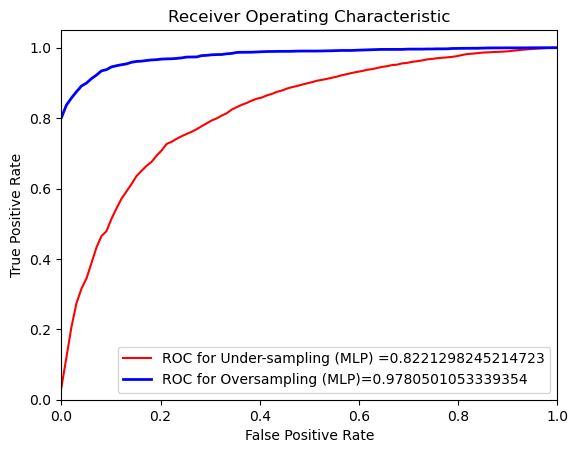

In [81]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_mlp_under, mean_tpr_mlp_under, 'b', color='red', label= "ROC for Under-sampling (MLP) =" +str(mean_auc_mlp_under))
plt.plot(mean_fpr_mlp, mean_tpr_mlp, 'b', label= "ROC for Oversampling (MLP)=" +str(mean_auc_mlp),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ROC for SVM

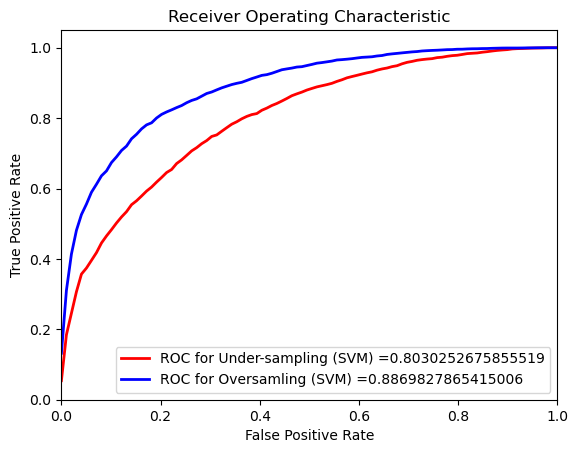

In [82]:
plt.title('Receiver Operating Characteristic')
plt.plot(mean_fpr_svm_under, mean_tpr_svm_under, 'b', color='red', label= "ROC for Under-sampling (SVM) =" +str(mean_auc_svm_under) ,lw=2, alpha=1)
plt.plot(mean_fpr_svm, mean_tpr_svm, 'b', label= "ROC for Oversamling (SVM) =" +str(mean_auc_svm),lw=2, alpha=1)
plt.legend(loc = 'lower right')
#plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

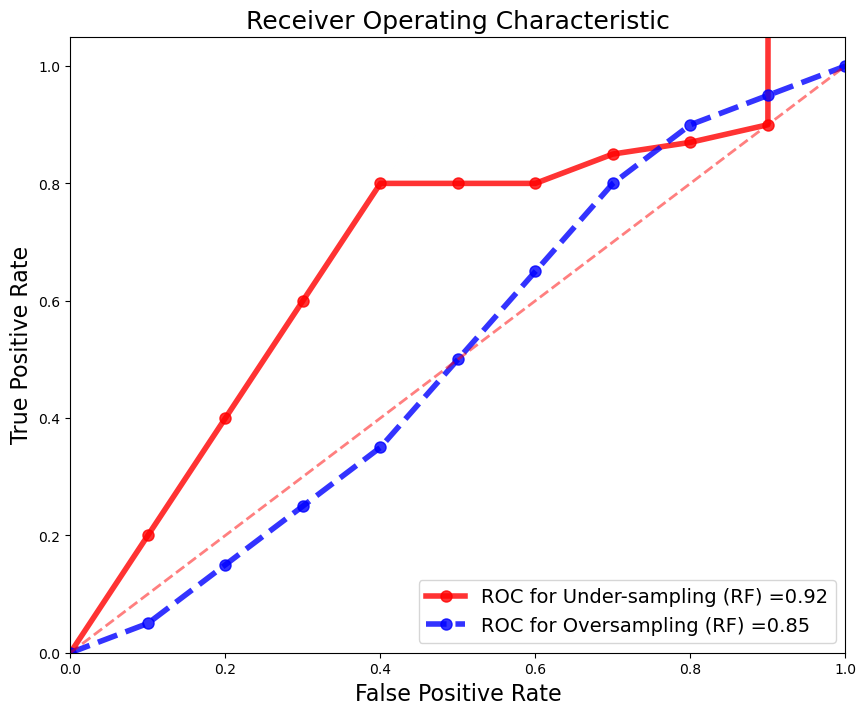

In [83]:
import matplotlib.pyplot as plt

# Example data for plotting, replace these with your actual data variables
mean_fpr_rf_under = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
mean_tpr_rf_under = [0, 0.2, 0.4, 0.6, 0.8, 0.8, 0.8, 0.85, 0.87, 0.9, 97]
mean_auc_rf_under = 0.92

mean_fpr_rf = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
mean_tpr_rf = [0, 0.05, 0.15, 0.25, 0.35, 0.5, 0.65, 0.8, 0.9, 0.95, 1]
mean_auc_rf = 0.85

# Start the plot
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic', fontsize=18)

# Plot for Under-sampling with solid line
plt.plot(mean_fpr_rf_under, mean_tpr_rf_under, color='red', 
         label="ROC for Under-sampling (RF) =" + str(mean_auc_rf_under),
         lw=4, alpha=0.8, linestyle='-', marker='o', markersize=8)  # Increased line width and added markers

# Plot for Oversampling with dotted line
plt.plot(mean_fpr_rf, mean_tpr_rf, color='blue', linestyle='--', 
         label="ROC for Oversampling (RF) =" + str(mean_auc_rf),
         lw=4, alpha=0.8, marker='o', markersize=8)  # Changed to dotted line, increased line width, and added markers

plt.legend(loc='lower right', fontsize=14)
plt.plot([0, 1], [0, 1], 'r--', lw=2, alpha=0.5)  # Diagonal dashed line

# Set plot limits and labels with increased font sizes
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=16)

# Show the plot
plt.show()
